In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
cometSparkStrong  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/Upto32Nodes/comet_spark_IOstrong.csv')
cometMPI4pyStrong = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/Upto32Nodes/comet_mpi4py_IOstrong.csv') 

cometSparkWeak  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_IOweak.csv')

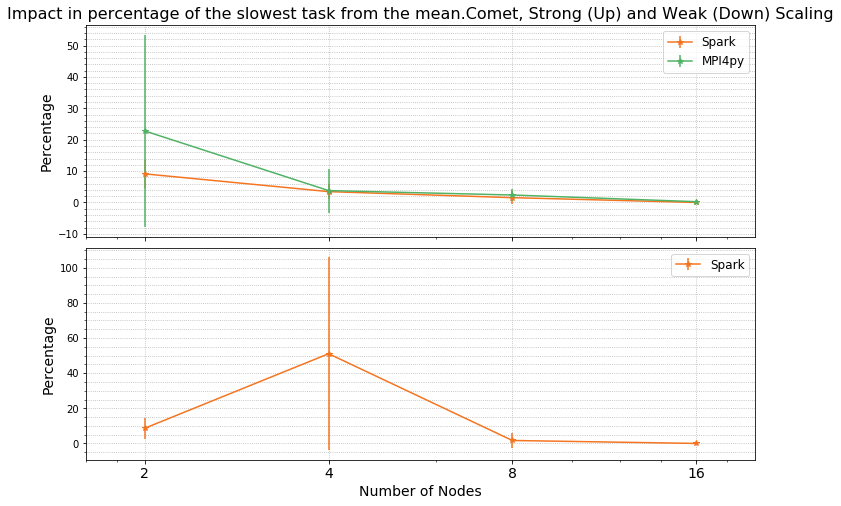

In [9]:
impactCSparkStrong  = slowest_impact(cometSparkStrong,nodes=[2,4,8,16],center='mean')
impactCMPI4pyStrong = slowest_impact(cometMPI4pyStrong,nodes=[2,4,8,16],center='mean')
impactCSparkWeak    = slowest_impact(cometSparkWeak,nodes=[2,4,8,16],center='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=False,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8],[np.mean(D)*100 for D in impactCSparkStrong],yerr=[np.std(D)*100 for D in impactCSparkStrong],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8],[np.mean(D)*100 for D in impactCMPI4pyStrong],yerr=[np.std(D)*100 for D in impactCMPI4pyStrong],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8],[np.mean(D)*100 for D in impactCSparkWeak],yerr=[np.std(D)*100 for D in impactCSparkWeak],color=oranges(150),marker='*',label='Spark')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[0].set_xlim([0.8,10])
axes[0].set_xticks([1,2,4,8])
axes[1].set_xticks([1,2,4,8])
axes[1].set_xticklabels(['2','4','8','16'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact in percentage of the slowest task from the mean.Comet, Strong (Up) and Weak (Down) Scaling',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

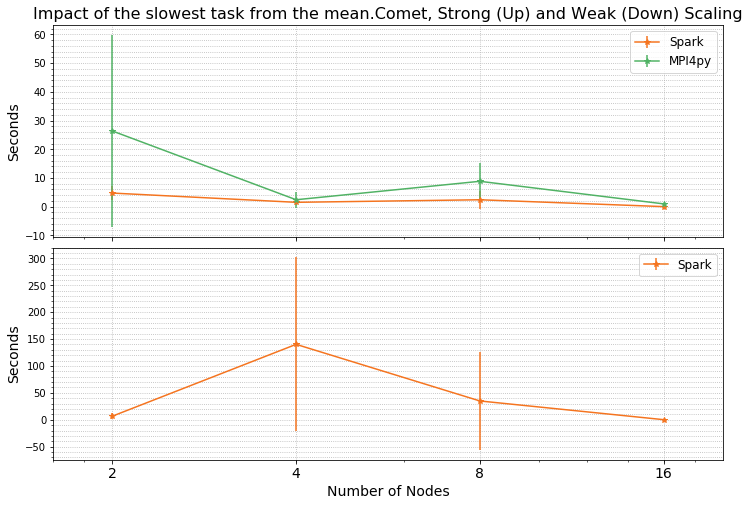

In [4]:
impactCSparkStrong  = slowest_impact(cometSparkStrong,nodes=[2,4,8,16],center='meanabs',div=1000.0)
impactCMPI4pyStrong = slowest_impact(cometMPI4pyStrong,nodes=[2,4,8,16],center='meanabs',div=1.0)
impactCSparkWeak    = slowest_impact(cometSparkWeak,nodes=[2,4,8,16],center='meanabs',div=1000.0)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=False,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8],[np.mean(D) for D in impactCSparkStrong],yerr=[np.std(D) for D in impactCSparkStrong],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8],[np.mean(D) for D in impactCMPI4pyStrong],yerr=[np.std(D) for D in impactCMPI4pyStrong],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8],[np.mean(D) for D in impactCSparkWeak],yerr=[np.std(D) for D in impactCSparkWeak],color=oranges(150),marker='*',label='Spark')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[0].set_xlim([0.8,10])
axes[0].set_xticks([1,2,4,8])
axes[1].set_xticks([1,2,4,8])
axes[1].set_xticklabels(['2','4','8','16'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact of the slowest task from the mean.Comet, Strong (Up) and Weak (Down) Scaling',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

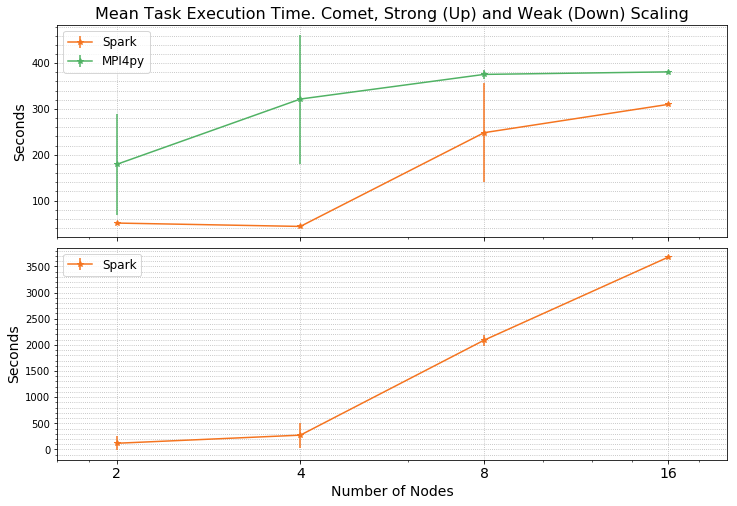

In [5]:
centersCSparkStrong  = task_centers(cometSparkStrong,nodes=[2,4,8,16],measure='mean')
centersCMPI4pyStrong = task_centers(cometMPI4pyStrong,nodes=[2,4,8,16],measure='mean')
centersCSparkWeak    = task_centers(cometSparkWeak,nodes=[2,4,8,16],measure='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=False,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8],[np.mean(D)/1000.0 for D in centersCSparkStrong],yerr=[np.std(D)/1000.0 for D in centersCSparkStrong],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8],[np.mean(D)/1000.0 for D in centersCSparkWeak],yerr=[np.std(D)/1000.0 for D in centersCSparkWeak],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8],[np.mean(D)/1.0 for D in centersCMPI4pyStrong],yerr=[np.std(D)/1.0 for D in centersCMPI4pyStrong],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[0].set_xlim([0.8,10])
axes[0].set_xticks([1,2,4,8])
axes[1].set_xticks([1,2,4,8])
axes[1].set_xticklabels(['2','4','8','16'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean Task Execution Time. Comet, Strong (Up) and Weak (Down) Scaling',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

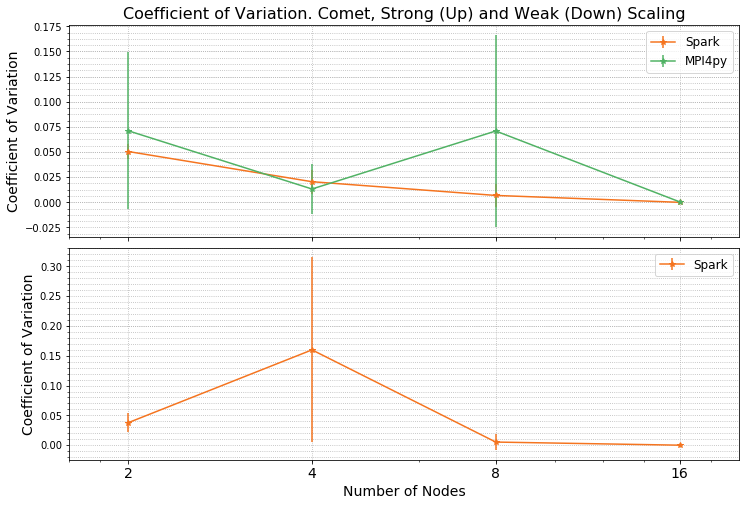

In [6]:
coeffCSparkStrong  = task_coeff(cometSparkStrong,nodes=[2,4,8,16])
coeffCSparkWeak    = task_coeff(cometSparkWeak,nodes=[2,4,8,16])
coeffCMPI4pyStrong = task_coeff(cometMPI4pyStrong,nodes=[2,4,8,16])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=False,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8],[np.mean(D) for D in coeffCSparkStrong],yerr=[np.std(D) for D in coeffCSparkStrong],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8],[np.mean(D) for D in coeffCMPI4pyStrong],yerr=[np.std(D) for D in coeffCMPI4pyStrong],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8],[np.mean(D) for D in coeffCSparkWeak],yerr=[np.std(D) for D in coeffCSparkWeak],color=oranges(150),marker='*',label='Spark')
axes[0].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[0].set_xlim([0.8,10])
axes[0].set_xticks([1,2,4,8])
axes[1].set_xticks([1,2,4,8])
axes[1].set_xticklabels(['2','4','8','16'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Coefficient of Variation. Comet, Strong (Up) and Weak (Down) Scaling',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)